**UNIVERSIDAD NACIONAL DE COLOMBIA**

*Leonar Santiago Castro Vizcaya*

*Brayan Valencia Quintero*

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import argparse

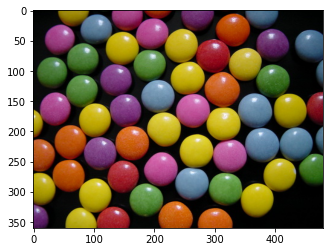

In [2]:
path_image= 'colors.jpg'

img = cv2.imread(path_image)
img = np.array(img, dtype=np.uint8)
img = cv2.cvtColor(img,  cv2.COLOR_BGR2RGB) #Cambia el orden de los canales
imgHsv = cv2.cvtColor(img,  cv2.COLOR_BGR2HSV)

plt.imshow(img)

In [103]:
class detect_color():

  def __init__(self, path):
    self.img = cv2.imread(path_image)
    self.img = np.array(img, dtype=np.uint8) 
    self.img = np.array(self.img, dtype=np.uint8)
    self.img = cv2.cvtColor(self.img,  cv2.COLOR_BGR2RGB) #Cambia el orden de los canales
    self.imgHsv = cv2.cvtColor(self.img,  cv2.COLOR_BGR2HSV)

  def Corte(self, color):
    if(color == 1):
      verde1 = np.array([40,0,20], np.uint8)
      verde2 = np.array([80,255,255], np.uint8)

      mask1 = cv2.inRange(self.imgHsv, verde1, verde2)
      maskverde = cv2.bitwise_and(self.imgHsv, self.imgHsv, mask = mask1)

      kernel = np.ones((8,8),np.uint8)

      img_hole = mask1 - np.random.randint(2,size=(mask1.shape[0],mask1.shape[1]),dtype=np.uint8)*255
      img_hole_removed = cv2.erode(cv2.dilate(img_hole,kernel),kernel)  

      img_noise = img_hole_removed + np.random.randint(2,size=(img_hole_removed.shape[0],img_hole_removed.shape[1]),dtype=np.uint8)*255
      kernel = np.ones((5,5),np.uint8) 
      mask2 = cv2.dilate(cv2.erode(img_noise,kernel),kernel)
      maskverde = cv2.bitwise_and(self.imgHsv, self.imgHsv, mask = mask2)
      SoloVerde = cv2.cvtColor(maskverde,  cv2.COLOR_HSV2RGB)
      img_color_detected = SoloVerde
      self.verde = SoloVerde

    if(color == 2):
      verde1 = np.array([25,0,20], np.uint8)
      verde2 = np.array([35,255,255], np.uint8)

      mask1 = cv2.inRange(self.imgHsv, verde1, verde2)
      maskverde = cv2.bitwise_and(self.imgHsv, self.imgHsv, mask = mask1)

      kernel = np.ones((7,7),np.uint8)

      img_hole = mask1 - np.random.randint(2,size=(mask1.shape[0],mask1.shape[1]),dtype=np.uint8)*255
      img_hole_removed = cv2.erode(cv2.dilate(img_hole,kernel),kernel)  

      img_noise = img_hole_removed + np.random.randint(2,size=(img_hole_removed.shape[0],img_hole_removed.shape[1]),dtype=np.uint8)*255
      kernel = np.ones((5,5),np.uint8) 
      mask2 = cv2.dilate(cv2.erode(img_noise,kernel),kernel)
      maskverde = cv2.bitwise_and(self.imgHsv, self.imgHsv, mask = mask2)
      SoloVerde = cv2.cvtColor(maskverde,  cv2.COLOR_HSV2RGB)
      img_color_detected = SoloVerde
      self.amarilla = SoloVerde


    if(color == 3):

      verde1 = np.array([145,100,41], np.uint8)
      verde2 = np.array([170,255,255], np.uint8)

      mask11 = cv2.inRange(imgHsv, verde1, verde2)
      maskverde = cv2.bitwise_and(imgHsv, imgHsv, mask = mask11)


      img_noise = mask11 + np.random.randint(2,size=(mask11.shape[0],mask11.shape[1]),dtype=np.uint8)*255

      kernel = np.ones((15,15),np.uint8) 

      img_noise_removed = cv2.dilate(cv2.erode(img_noise,kernel),kernel)


      img_hole = img_noise_removed - np.random.randint(2,size=(img_noise_removed.shape[0],img_noise_removed.shape[1]),dtype=np.uint8)*255


      img_hole_removed = cv2.erode(cv2.dilate(img_hole,kernel),kernel) 

      img_noise = img_hole_removed + np.random.randint(2,size=(img_hole_removed.shape[0],img_hole_removed.shape[1]),dtype=np.uint8)*255
      kernel = np.ones((5,5),np.uint8) 
      mask2 = cv2.dilate(cv2.erode(img_noise,kernel),kernel)
      maskverde = cv2.bitwise_and(self.imgHsv, self.imgHsv, mask = mask2)
      SoloVerde = cv2.cvtColor(maskverde,  cv2.COLOR_HSV2RGB)
      img_color_detected = SoloVerde
      self.morado = SoloVerde
    return img_color_detected

  def Canvas(self):
    imagen = self.img
    verde = self.Corte(1)
    ama = self.Corte(2)
    mor = self.Corte(3)
    fig = plt.figure(1)

    fig.set_figheight(70)   
    fig.set_figwidth(70)

    ax1 = plt.subplot2grid(shape=(10,10), loc=(0,0))
    ax2 = plt.subplot2grid(shape=(10,10), loc=(0,1))
    ax3 = plt.subplot2grid(shape=(10,10), loc=(0,2))
    ax4 = plt.subplot2grid(shape=(10,10), loc=(0,3))

    f = img.shape

    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title('RGB')
    
    ax2.imshow(verde)
    ax2.axis('off')
    ax2.set_title('Green')
    ax3.imshow(ama)
    ax3.axis('off')
    ax3.set_title('Yellow')
    ax4.imshow(mor)
    ax4.axis('off')
    ax4.set_title('Violet')


  def Conteo_proceso(self, pcolor):
    if(pcolor == 1):
      #Deteccion de color
      verde_deteccion = self.Corte(1)
      verde_conteo = verde_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_verdes = cv2.cvtColor(verde_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_verdes =  cv2.Canny(grises_verdes, 10, 631)

      ctns, _ = cv2.findContours(bordes_verdes, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos verdes encontrados: '+ str(len(ctns))
      cv2.putText(verde_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)

    if pcolor == 2: 
      #Deteccion de color
      verde_deteccion = self.Corte(2)
      verde_conteo = verde_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_verdes = cv2.cvtColor(verde_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_verdes =  cv2.Canny(grises_verdes, 10, 420)

      ctns, _ = cv2.findContours(bordes_verdes, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos Amarillos encontrados: '+ str(len(ctns))
      cv2.putText(verde_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)
      
    if pcolor == 3: 
      #Deteccion de color
      verde_deteccion = self.Corte(3)
      verde_conteo = verde_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_verdes = cv2.cvtColor(verde_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_verdes =  cv2.Canny(grises_verdes, 0, 150)

      ctns, _ = cv2.findContours(bordes_verdes, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos Violetas encontrados: '+ str(len(ctns))
      cv2.putText(verde_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)
      
    fig = plt.figure(1)
    fig.set_figheight(70)   
    fig.set_figwidth(70)

    ax1 = plt.subplot2grid(shape=(10,10), loc=(0,0))
    ax2 = plt.subplot2grid(shape=(10,10), loc=(0,1))
    ax3 = plt.subplot2grid(shape=(10,10), loc=(0,2))
    ax4 = plt.subplot2grid(shape=(10,10), loc=(0,3))

    f = img.shape

    ax1.imshow(self.Corte(pcolor))
    ax1.axis('off')
    ax1.set_title('Deteccion de color')

    ax2.imshow(grises_verdes, cmap='gray')
    ax2.axis('off')
    ax2.set_title('Transformacion a espacio de grises')
    ax3.imshow(bordes_verdes, cmap='gray')
    ax3.axis('off')
    ax3.set_title('Extraccion de bordes')
    ax4.imshow(verde_conteo, cmap='gray')
    ax4.axis('off')
    ax4.set_title('Conteo')

  def Conteo_total(self):
     #Deteccion de color VERDE ###############################################
      verde_deteccion = self.Corte(1)
      verde_conteo = verde_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_verdes = cv2.cvtColor(verde_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_verdes =  cv2.Canny(grises_verdes, 10, 631)

      ctns, _ = cv2.findContours(bordes_verdes, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos verdes encontrados: '+ str(len(ctns))
      cv2.putText(verde_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)

      #Deteccion de color AMARILLO#############################################
      amarillo_deteccion = self.Corte(2)
      amarillo_conteo = amarillo_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_amarillo = cv2.cvtColor(amarillo_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_amarillo =  cv2.Canny(grises_amarillo, 10, 420)

      ctns2, _ = cv2.findContours(bordes_amarillo, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos Amarillos encontrados: '+ str(len(ctns2))
      cv2.putText(amarillo_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)

      #Deteccion de color VIOLETA###############################################
      violeta_deteccion = self.Corte(3)
      violeta_conteo = violeta_deteccion

      #Transformacion del espacio de color bgr a gray y extraccion de bordes
      grises_violeta = cv2.cvtColor(violeta_deteccion, cv2.COLOR_BGR2GRAY)
      bordes_violeta =  cv2.Canny(grises_violeta, 0, 150)

      ctns3, _ = cv2.findContours(bordes_violeta, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #cv2.drawContours(verde, ctns, -1, (0,0,255), 2)
      color = (200,0,0)
      #print('Número de contornos encontrados: ', len(ctns))
      texto = 'Caramelos Violetas encontrados: '+ str(len(ctns3))
      cv2.putText(violeta_conteo, texto, (10,20), cv2.FONT_ITALIC, 0.7,
        color, 2, cv2.LINE_AA)

      fig = plt.figure(1)
      fig.set_figheight(70)   
      fig.set_figwidth(70)

      ax1 = plt.subplot2grid(shape=(10,10), loc=(0,0))
      ax2 = plt.subplot2grid(shape=(10,10), loc=(0,1))
      ax3 = plt.subplot2grid(shape=(10,10), loc=(0,2))
      ax4 = plt.subplot2grid(shape=(10,10), loc=(0,3))

      f = img.shape

      ax1.imshow(cv2.cvtColor(self.img,  cv2.COLOR_RGB2BGR))
      ax1.axis('off')
      ax1.set_title('Imagen Original')

      ax2.imshow(verde_conteo, cmap='gray')
      ax2.axis('off')
      ax2.set_title('Verdes')
      ax3.imshow(amarillo_conteo, cmap='gray')
      ax3.axis('off')
      ax3.set_title('Amarillas')
      ax4.imshow(violeta_conteo, cmap='gray')
      ax4.axis('off')
      ax4.set_title('Violetas')

#Deteccion de cada color 

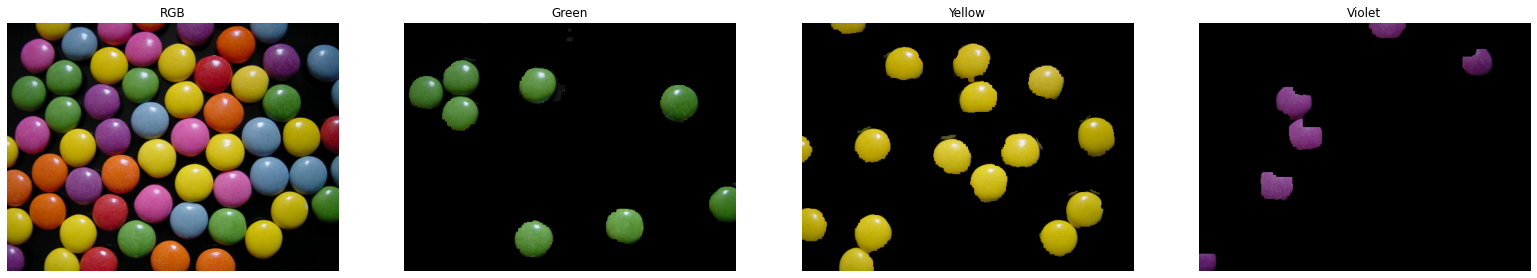

In [104]:
Color = detect_color('/content/colors.jpg')
completo = Color.Canvas()
completo

#Conteo total de colores

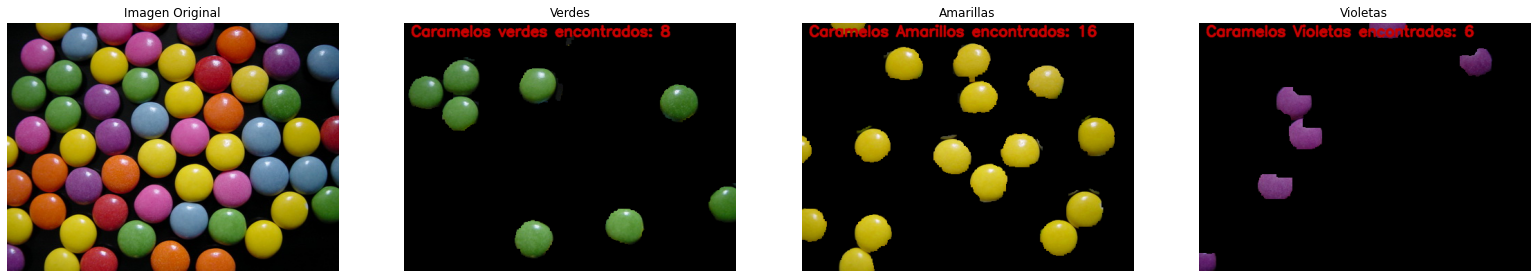

In [114]:
Color.Conteo_total()

#Proceso para contar cada color 

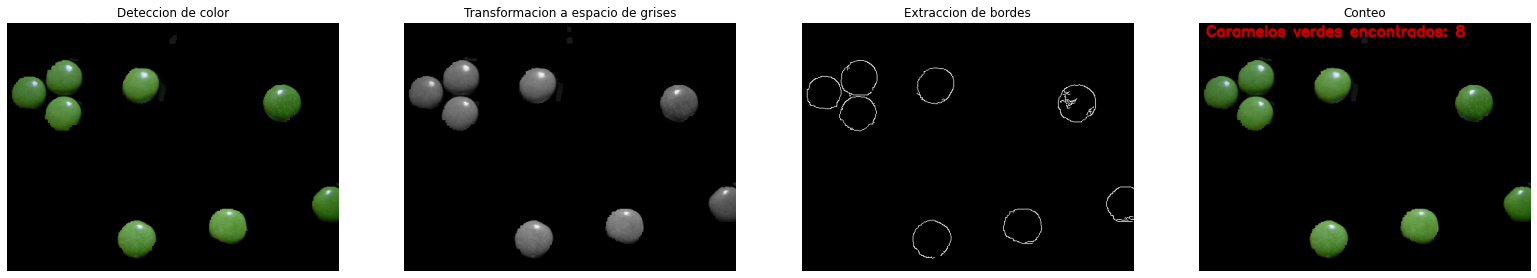

In [55]:
Color.Conteo_proceso(1)

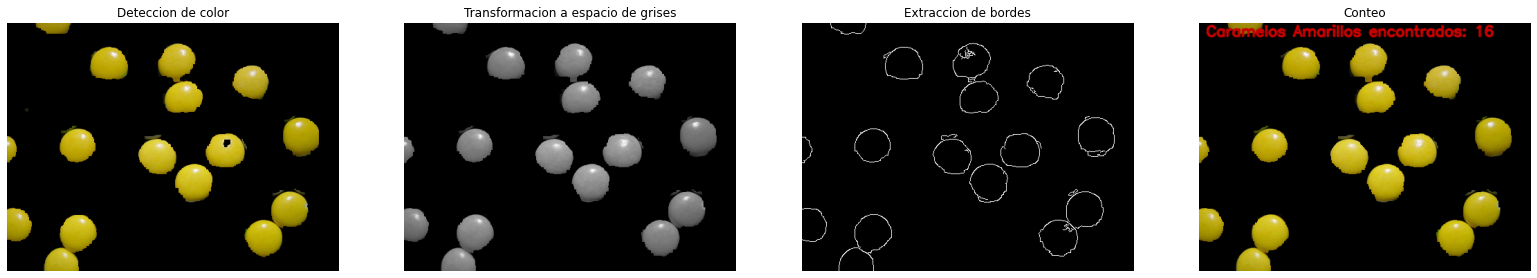

In [69]:
Color.Conteo_proceso(2)

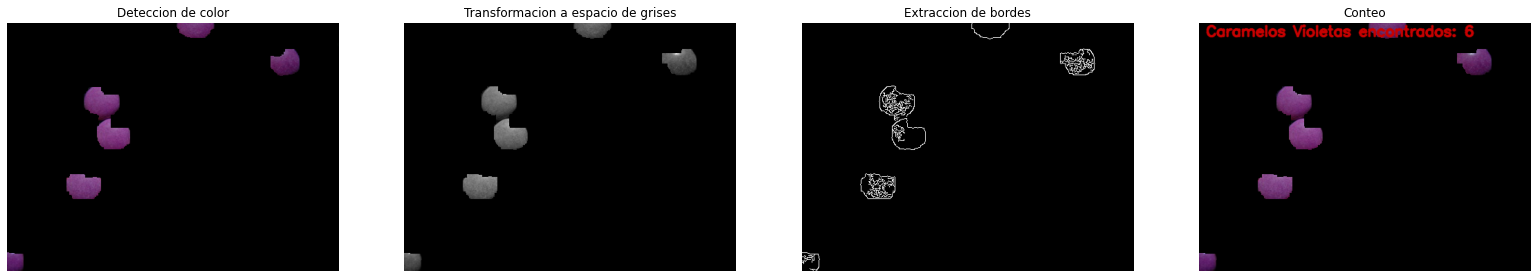

In [85]:
Color.Conteo_proceso(3)